In [1]:
import numpy as np
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
import PatcherBot as pb
import pandas as pd
from glob import glob
import h5py
import os
import matplotlib.pyplot as plt


In [2]:
sumPath = '/Users/zhengj10/Desktop/Recent data/Frame_drop/'
imgPath = '/Volumes/Backup Plus/PatcherBot/raw/'

In [3]:
df = pd.read_excel(sumPath+'params.xlsx')
df

,Date,Plate,Sensor,Cell#,Cam trig delay (ms),LED TTL type,LED TTL period (ms),LED TTL delay,LED TTL duration (ms),V-step order,V-step delay (ms),Power (%)
0,2021.02.11_000,plate_000,376.20948,patch_attempt_0002_000,10,pulse train,1.01,0,20,neg to pos,500,40
1,2021.02.11_000,plate_000,376.20948,patch_attempt_0005_000,10,pulse train,1.01,0,20,pos to neg,500,40
2,2021.02.11_000,plate_000,376.20948,patch_attempt_0006_000,10,pulse train,1.01,0,20,pos to neg,300,40
3,2021.02.11_000,plate_000,376.20948,patch_attempt_0007_000,10,pulse train,1.01,0,20,pos to neg,300,40
4,2021.02.11_000,plate_000,376.20948,patch_attempt_0008_000,10,pulse train,1.01,0,20,pos to neg,300,40
5,2021.02.11_000,plate_000,376.20948,patch_attempt_0009_000,10,pulse train,1.01,0,20,pos to neg,500,40
6,2021.02.11_000,plate_000,376.20948,patch_attempt_0010_000,10,pulse train,1.01,0,20,pos to neg,500,40
7,2021.02.12_000,plate_000,376.20950,patch_attempt_0003_000,10,single pulse,NaN,0,30,pos to neg,500,50
8,2021.02.12_000,plate_000,376.20950,patch_attempt_0004_000,0,single pulse,NaN,0,30,pos to neg,500,50
9,2021.02.12_000,plate_000,376.20950,patch_attempt_0006_000,0,single pulse,NaN,0,30,pos to neg,500,50


In [5]:
df_plot = df[((df['LED TTL type']=='single pulse'))&(df['LED TTL type']=='single pulse')&(df['V-step delay (ms)']==300)]
df_plot

,Date,Plate,Sensor,Cell#,Cam trig delay (ms),LED TTL type,LED TTL period (ms),LED TTL delay,LED TTL duration (ms),V-step order,V-step delay (ms),Power (%)
14,2021.02.12_000,plate_000,376.2095,patch_attempt_0000_000,0,single pulse,NaN,0,30,pos to neg,300,50
15,2021.02.12_000,plate_000,376.2095,patch_attempt_0001_000,0,single pulse,NaN,0,30,pos to neg,300,50
16,2021.02.12_000,plate_000,376.2095,patch_attempt_0002_001,0,single pulse,NaN,0,30,pos to neg,300,50
17,2021.02.12_000,plate_000,376.2095,patch_attempt_0004_001,0,single pulse,NaN,0,30,pos to neg,300,50
18,2021.02.12_000,plate_000,376.2095,patch_attempt_0005_001,0,single pulse,NaN,0,30,pos to neg,300,50
19,2021.02.12_000,plate_000,376.2095,patch_attempt_0006_001,0,single pulse,NaN,0,30,pos to neg,300,50


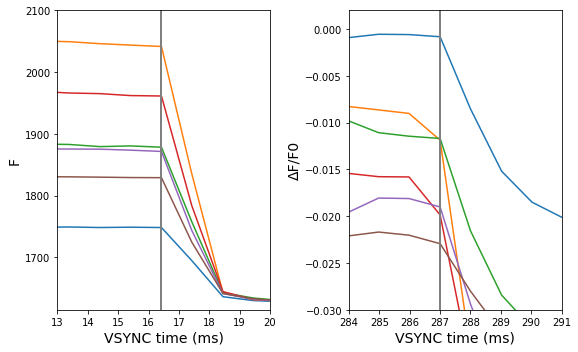

In [6]:
fig = plt.figure(figsize=[8,5])
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

z = 0

peak_index_all = []
for i,r in df_plot.iterrows():
    idx_all_trials = []
    timing_all_trials = []
    frame_offset_all_trials = []
    
    if r['V-step order'] == 'neg to pos':
        daqData = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell#'],'camera_clamp1_000','008','Camera','daqResult.ma')
        imgData = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell#'],'camera_clamp1_000','008','Camera','frames.ma')
    
    else:
        daqData = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell#'],'camera_clamp1_000','000','Camera','daqResult.ma')
        imgData = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell#'],'camera_clamp1_000','000','Camera','frames.ma')

    daqData = h5py.File(daqData,'r')
    V_SYNC = daqData['data'][()][1]
    
    peak_indices = np.where(V_SYNC==1)
    peak_index = [k for k in range(peak_indices[0].shape[0]) if peak_indices[0][k]-peak_indices[0][k-1]!=1]
    peak_index = peak_indices[0][peak_index]
    peak_index_ms = peak_index/40.0 # change to ms
    #             print(peak_index.shape)
    for i in range(peak_index.shape[0]):
        if peak_index_ms[i]>=500.0:
    #                     print(i,peak_index[i])
            idx = i
            break

    stim_timing = peak_index[idx]
    idx_all_trials.append(idx)
    timing_all_trials.append(stim_timing)

    imgFile = h5py.File(imgData,'r')
    imgData = imgFile['data'][()]
    
#     imgTime = h5py.File(imgFile,'r')
    imgTime = imgFile['info']['0']['values'][()]
#     print(imgTime[275:285])

    F_all = []
    for frame in range(imgData.shape[0]):
        F = np.mean(imgData[frame,240:272,:])
        F_all.append(F)

        
    offset = 15
    

    peak_index_all.append(peak_index_ms[:1700])
    
    # # Frame drop deduction at light on
    ax1.plot(peak_index_ms[:1700],F_all[:1700])
    ax1.set_xlim([r['Cam trig delay (ms)']+13,r['Cam trig delay (ms)']+20])
#     ax1.set_xlim([r['Cam trig delay (ms)']+1,r['Cam trig delay (ms)']+8])
    ax1.set_ylim([1615,2100])
#     ax1.plot([16.425,16.425],[1600,2110],color='k',lw=0.3)
    ax1.plot([16.425,16.425],[1600,2110],color='gray')
    
    
    ## Frame drop deduction at F change
#     ax2.plot(peak_index_ms[:1700],F_all[:1700])
    ax2.plot(peak_index_ms[:1700],np.array(F_all[:1700])/F_all[r['V-step delay (ms)']-50]-1-z)
#     ax2.set_xlim([r['V-step delay (ms)']-30,r['V-step delay (ms)']])
    ax2.set_xlim([r['V-step delay (ms)']-16,r['V-step delay (ms)']-9])
    ax2.set_ylim([-0.03,0.002])
#     ax2.plot([486.625,486.625],[-0.03,0.003],color='k')
    ax2.plot([287,287],[-0.03,0.003],color='gray')
#     print(peak_index_ms[275:285])

    ax1.set_xlabel('VSYNC time (ms)',size=14)
    ax2.set_xlabel('VSYNC time (ms)',size=14)
    ax1.set_ylabel('F',size=14)
    ax2.set_ylabel('\u0394F/F0',size=14)
    
    z+=0.004
plt.tight_layout()
# fig.savefig(sumPath+'single_pulse_0_cam_delay_300ms_VC_delay.png')
plt.show()


In [289]:
a = np.std(peak_index_all,axis=0)

In [290]:
np.sum(a!=0)

681

In [1]:
plt.plot(peak_index_ms[:1700],np.array(F_all[:1700])/F_all[r['V-step delay (ms)']-50]-1)
# plt.xlim([r['V-step delay (ms)']-16,r['V-step delay (ms)']-9])

NameError: name 'plt' is not defined

In [292]:
peak_index_ms[281]

287.0

In [293]:
peak_index_ms[14]

16.425

In [294]:
281-3

278

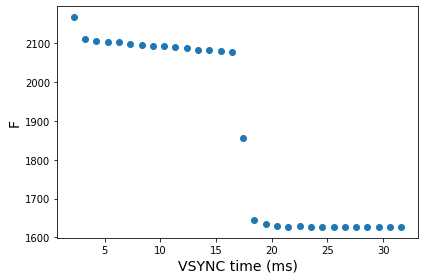

In [300]:
plt.scatter(peak_index_ms[:2*offset],F_all[:2*offset])
plt.xlabel('VSYNC time (ms)',size=14)
plt.ylabel('F',size=14)

plt.tight_layout()
plt.savefig(sumPath+'Single_pulse_0_ms_cam_trig_delay_leading_flash_seg_500_ms_VC_delay.png')
plt.show()


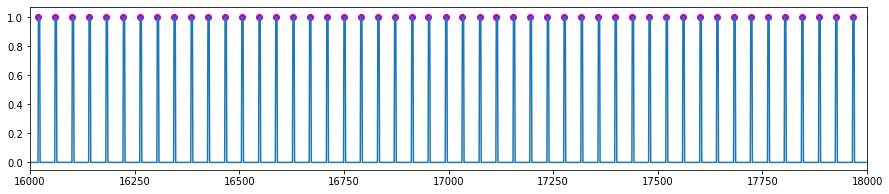

In [207]:
fig = plt.figure(figsize=[15,3])
plt.plot(V_SYNC)
plt.scatter(peak_index,np.ones(peak_index.shape),color='m')
# i=0
plt.xlim([i,i+2000])
# plt.xlim([0,2000])
i=i+2000
# print(i)

In [4]:
print(len(peak_index_ms),len(F_all))
# peak_index_ms[-1]

1972 3267


(0, 600)

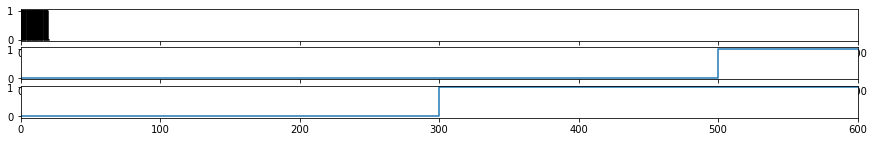

In [269]:
plt.figure(figsize=[15,2])
x_repeat = np.array([0,0.5,0.5,1.01,1.01])
y_repeat = [1,1,0,0,1]
ax1 = plt.subplot(3,1,1)
for i in range(20):
    if i!=19:
        ax1.plot(x_repeat,y_repeat,color='k')
    else:
        ax1.plot(x_repeat[:4],y_repeat[:4],color='k')
    x_repeat+=1.01
ax1.set_xlim([0,600])
ax2 = plt.subplot(3,1,2)
ax2.plot([0,500,500,600],[0,0,1,1])
ax2.set_xlim([0,600])

ax3 = plt.subplot(3,1,3)
ax3.plot([0,300,300,600],[0,0,1,1])
ax3.set_xlim([0,600])

ax3 = plt.subplot(3,1,3)
ax3.plot([0,300,300,600],[0,0,1,1])
ax3.set_xlim([0,600])


In [ ]:
fig = plt.figure(figsize=[15,3])
plt.plot(F_all)
i = 20
# plt.xlim([475,525])
# for q in range(122):
#     plt.plot(F_all[i:i+10])
#     i = i+10
# plt.savefig('/Users/zhengj10/Desktop/005.png')


In [ ]:
# fig = plt.figure(figsize=[10,80])
# # plt.plot(F_all)
# i = 20
# x = 1
# for q in range(50):
#     ax = plt.subplot(50,1,x)
#     ax.plot(F_all[i:i+20])
#     i = i+20
#     ax.set_ylabel(x)
#     x+=1
# plt.savefig('/Users/zhengj10/Desktop/008.png')


In [ ]:
F = np.array(F_all)

In [ ]:
len(peak_index)

In [ ]:
F_big = F>1670

In [ ]:
np.sum(F_big)

In [ ]:
F_big.shape

In [ ]:
# frame_offset_all_cells
# len(idx_all_cells)
# len(timing_all_cells)

In [ ]:
frame_offset = []
for i in range(len(frame_offset_all_cells)):
    frame_offset.append(frame_offset_all_cells[i][0])


In [ ]:
stim_idx = []
for i in range(len(idx_all_cells)):
    stim_idx.append(idx_all_cells[i][0])
    

In [ ]:
stim_timing = []
for i in range(len(timing_all_cells)):
    stim_timing.append(timing_all_cells[i][0])
    

In [ ]:
x = np.arange(no_cells)
plt.scatter(x,frame_offset)
# plt.ylim([479,485])
# plt.xlim([500,600])
# plt.savefig('/Users/zhengj10/Desktop/frames_offset_individual.png')
plt.show()

In [ ]:
np.median(frame_offset)

In [ ]:
plt.plot(F_all[idx-20:idx+20])
# plt.ylim([479,485])
# plt.xlim([2,10])


In [ ]:
plt.plot(stim_idx)
plt.ylim([470,494])
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/stim_idx.png')
plt.show()

In [ ]:
plt.plot(stim_timing)
# plt.ylim([500.5,500.9])
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/frames_offset.png')
plt.show()

In [ ]:
fig = plt.figure()
traces = df.traces.to_list()
x = np.linspace(-20,19,40)
for trace in traces:
    trace = np.array(trace)
    plt.plot(x,trace-trace[0])
plt.xlabel('frame#')
plt.ylabel('deltaF')
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/Frames drop issue/traces.png',dpi=1200)


In [ ]:
df = pd.DataFrame({'cell_id':cell_id,'frame_offset':frame_offset,'stim_idx':stim_idx,'stim_timing':stim_idx,'traces':traces})

In [ ]:
df

In [ ]:
# df.to_pickle('/Users/zhengj10/Desktop/frames_drops.pkl')
# df.to_excel('/Users/zhengj10/Desktop/frames_drops.xlsx')

In [ ]:
ax = df.frame_offset.plot(kind='hist')
ax.set_xlabel('No. of frames offset')
ax.set_ylabel('Frequency')
plt.show()

In [ ]:
ax = df.frame_offset.plot()
ax.set_xlabel('Cell #')
ax.set_ylabel('No. of frames offset')
plt.show()

In [ ]:
dataPath = '/Volumes/Backup Plus/PatcherBot/raw/2020.10.15_000/plate_000/patch_attempt_0000_000/camera_clamp1_000/008'

In [ ]:
# dataFile = dataPath+'/Clamp1.ma'
# dataFile = dataPath+'Camera/daqResult.ma'
dataFile = dataPath+'/Camera/frames.ma'

In [ ]:
data = h5py.File(dataFile,'r')

In [ ]:
# data = data['data'][()]
data = data['info']['0']['values'][()]

In [ ]:
data.shape

In [ ]:
plt.plot(data[0])
plt.xlim([19990,20010])

In [ ]:
F_all = []
for frame in range(data.shape[0]):
    F = np.mean(data[frame,234:274,:])
    F_all.append(F)

In [ ]:
plt.plot(F_all)
plt.xlim([460,500])

In [ ]:
timing_info = []
for timing in range(data.shape[0]-1):
    timing_info.append(data[timing+1]-data[timing])

plt.plot(timing_info)

In [ ]:
class student:
    def __init__(self,name,age):
        self.name = name
        self.age = age
    def double_it(self,x):
        return x*2
    def get_mean(self,x):
        return np.mean(x)

        

In [ ]:
jihong = student('jihong',22)

In [ ]:
jihong.age

In [ ]:
jihong.double_it(10)

In [ ]:
jihong.get_mean([2,3])